In [3]:
import matplotlib.pyplot as plt
from hydromt_sfincs import SfincsModel, utils
import xarray as xr
import os
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import hydromt 
from hydromt_sfincs import SfincsModel
from matplotlib import animation
from hydromt.config import configread
from hydromt.log import setuplog


## Get SFINCS model

In [4]:
#sfincs_root_base = r"c:\git\sfincs_alblasserwaard\sfincs_discharge_base"  # (relative) path to sfincs root

sfincs_root = r"p:\11209905-dca-sfincs-river\01_models\reduced_fixbridges\KoldingA_PAK_res25_sub5"
sfincs_root_2 = r"p:\11209905-dca-sfincs-river\01_models\reduced_fixbridges\KoldingA_PAK_res25_sub5_riv3m"

#scenario_name = f"WL_{waterlevel}_breach_{breach}_depth_adjust_{depth_adjust}"

working_dir = os.path.abspath(".")

logger = setuplog("update", "./hydromt.log", log_level=10)
yml_file = join(working_dir, "setup_sfincs_kolding.yml")
opt = configread(yml_file)  # read settings from ini file
kwargs = opt.pop("global", {})

mod = SfincsModel(sfincs_root, mode="r", logger= logger, **kwargs)
mod_riv = SfincsModel(sfincs_root_2, mode="r", logger= logger, **kwargs)

#  # Select our highest-resolution elevation dataset
# dep = mod.data_catalog.get_rasterdataset("DEM_5x5m")

2024-03-20 14:18:59,542 - update - log - DEBUG - Appending log messages to file ./hydromt.log.
2024-03-20 14:18:59,545 - update - log - INFO - HydroMT version: 0.9.3
2024-03-20 14:18:59,692 - update - data_catalog - INFO - Parsing data catalog from c:/git/DCA_sfincs/02_scripts/input/local_data.yml
2024-03-20 14:19:01,118 - update - data_catalog - INFO - Reading data catalog deltares_data v2024.1.30
2024-03-20 14:19:01,119 - update - data_catalog - INFO - Parsing data catalog from https://raw.githubusercontent.com/Deltares/hydromt/main/data/catalogs/deltares_data.yml
2024-03-20 14:19:03,227 - update - log - DEBUG - Appending log messages to file p:\11209905-dca-sfincs-river\01_models\reduced_fixbridges\KoldingA_PAK_res25_sub5\hydromt.log.
2024-03-20 14:19:03,229 - update - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.0.3).
2024-03-20 14:19:03,236 - update - data_catalog - INFO - Parsing data catalog from c:/git/DCA_sfincs/02_scripts/input/local_data.yml
2024-03-2

## Waterlevel


nodata value missing for p:\11209905-dca-sfincs-river\01_models\reduced_fixbridges\KoldingA_PAK_res25_sub5\gis\hsmax.tif
nodata value missing for p:\11209905-dca-sfincs-river\01_models\reduced_fixbridges\KoldingA_PAK_res25_sub5_riv3m\gis\hsmax.tif


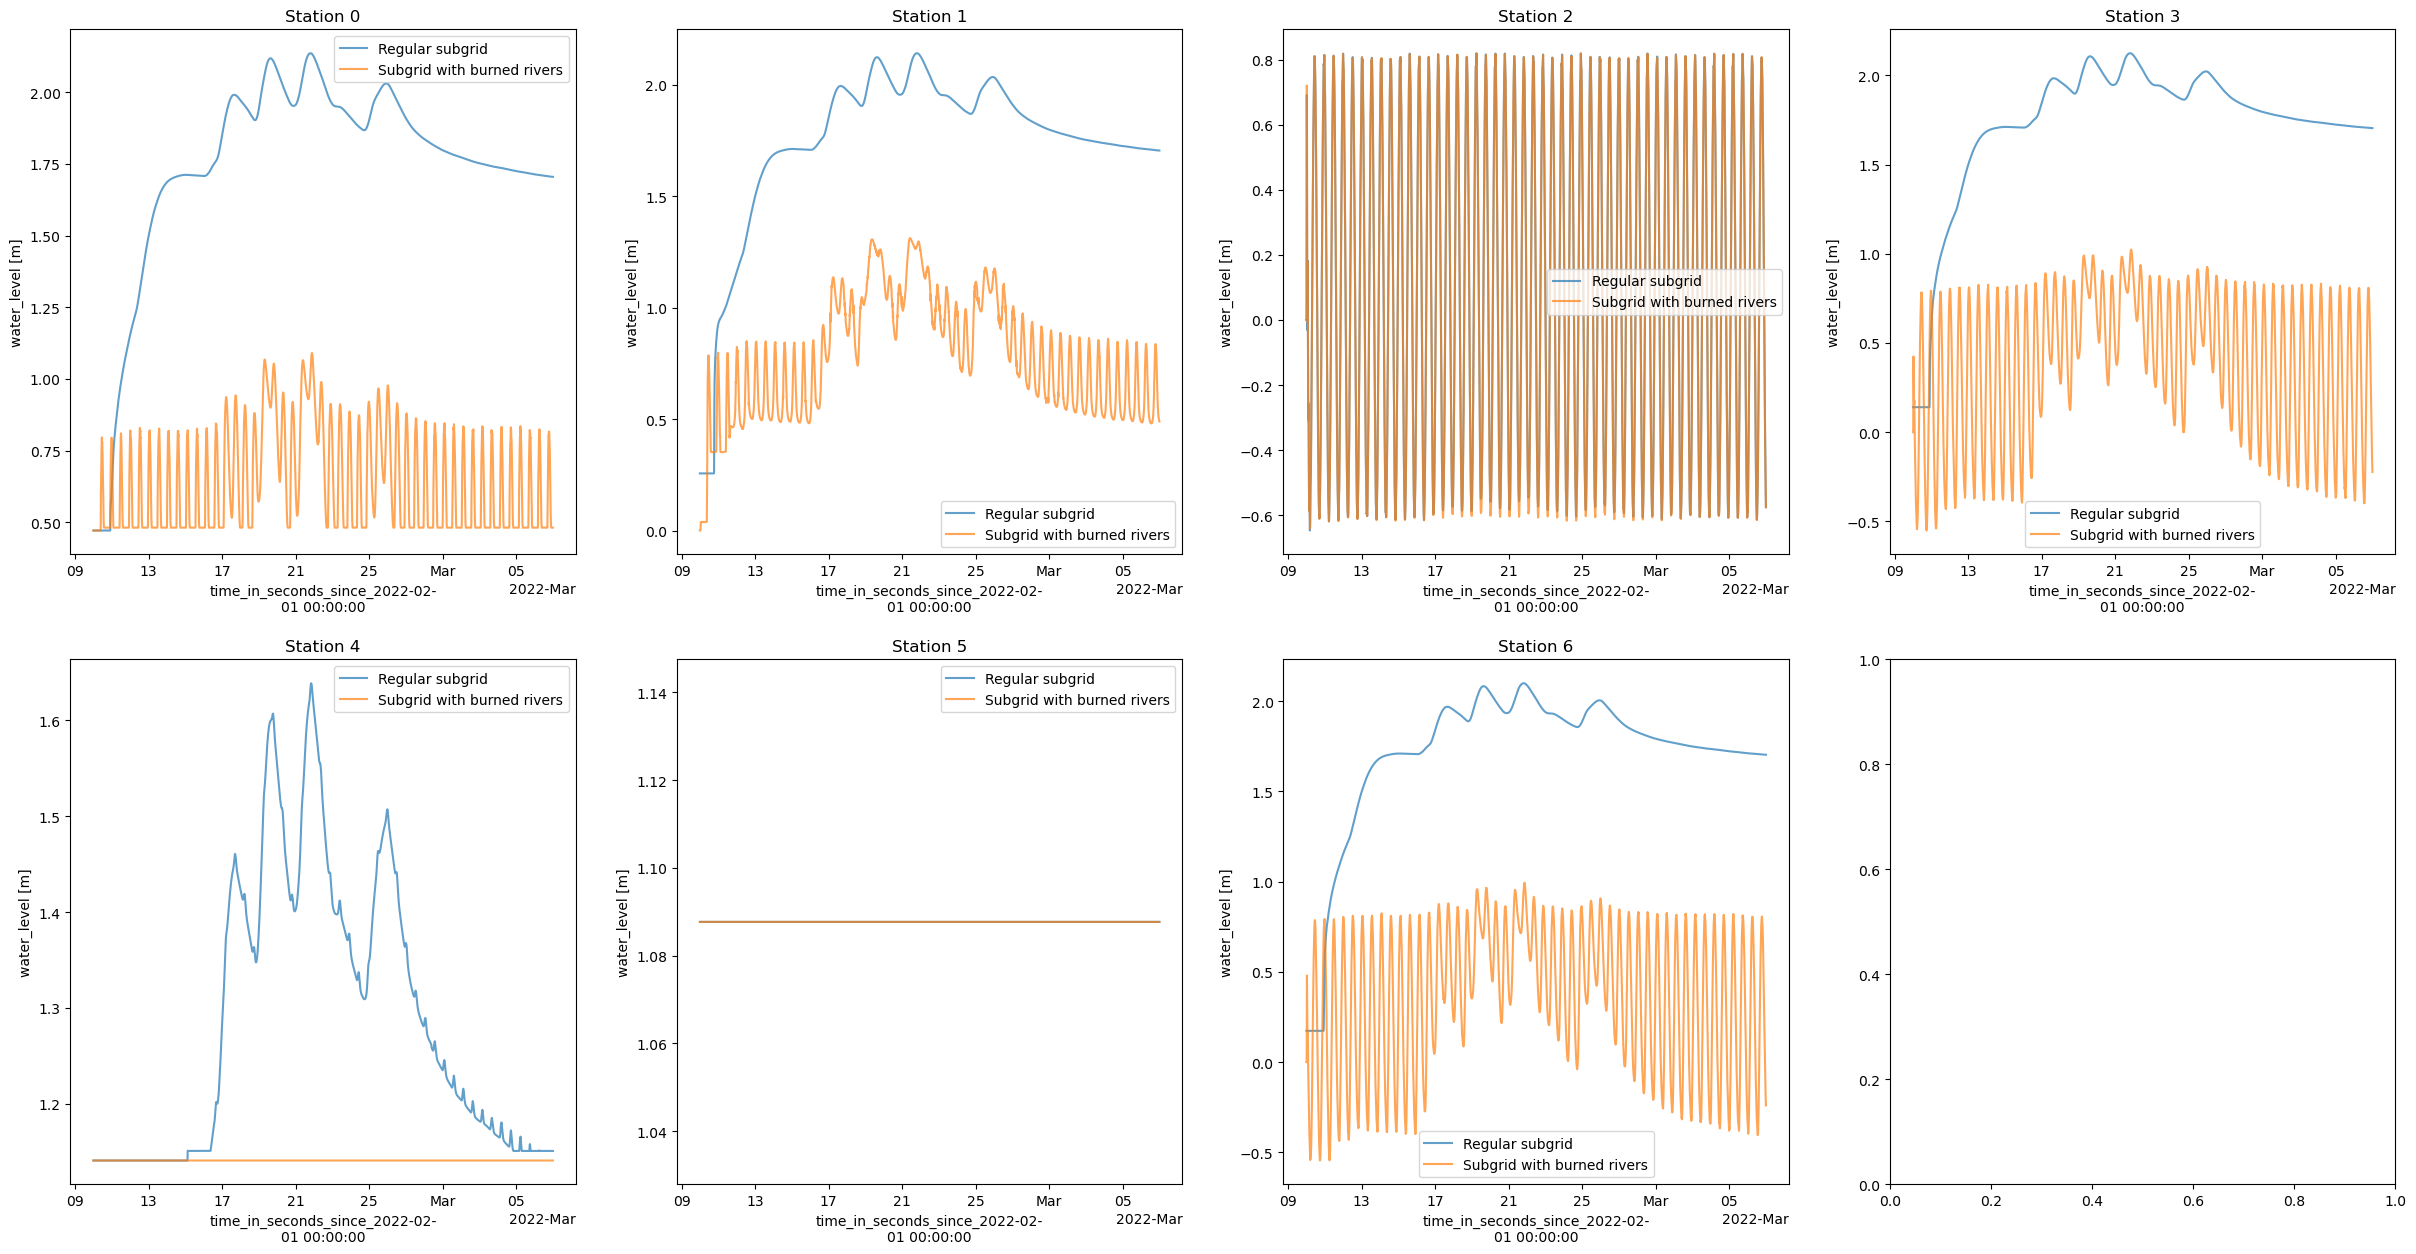

In [5]:


h_point = mod.results["point_zs"].rename({"stations": "station_id"})
h_point["station_id"] = h_point["station_id"].astype(int)

h_point_riv = mod_riv.results["point_zs"].rename({"stations": "station_id"})
h_point_riv["station_id"] = h_point_riv["station_id"].astype(int)


fig, ax = plt.subplots(2,4, figsize = (30,15))
ax_flat = ax.flatten()


for i in range(len(h_point["station_id"])):
    # Plot the water level at the every gauge
    _ = h_point.sel({"station_id": i + 1}).plot.line(
        x="time",
        ax = ax_flat[i],
        label = "Regular subgrid",
        alpha = 0.7
    )

    _ = h_point_riv.sel({"station_id": i + 1}).plot.line(
        x="time",
        ax = ax_flat[i],
        label = "Subgrid with burned rivers",
        alpha = 0.7
    )

    ax_flat[i].set_title(f"Station {i}")
    ax_flat[i].legend()



## Waterdepth

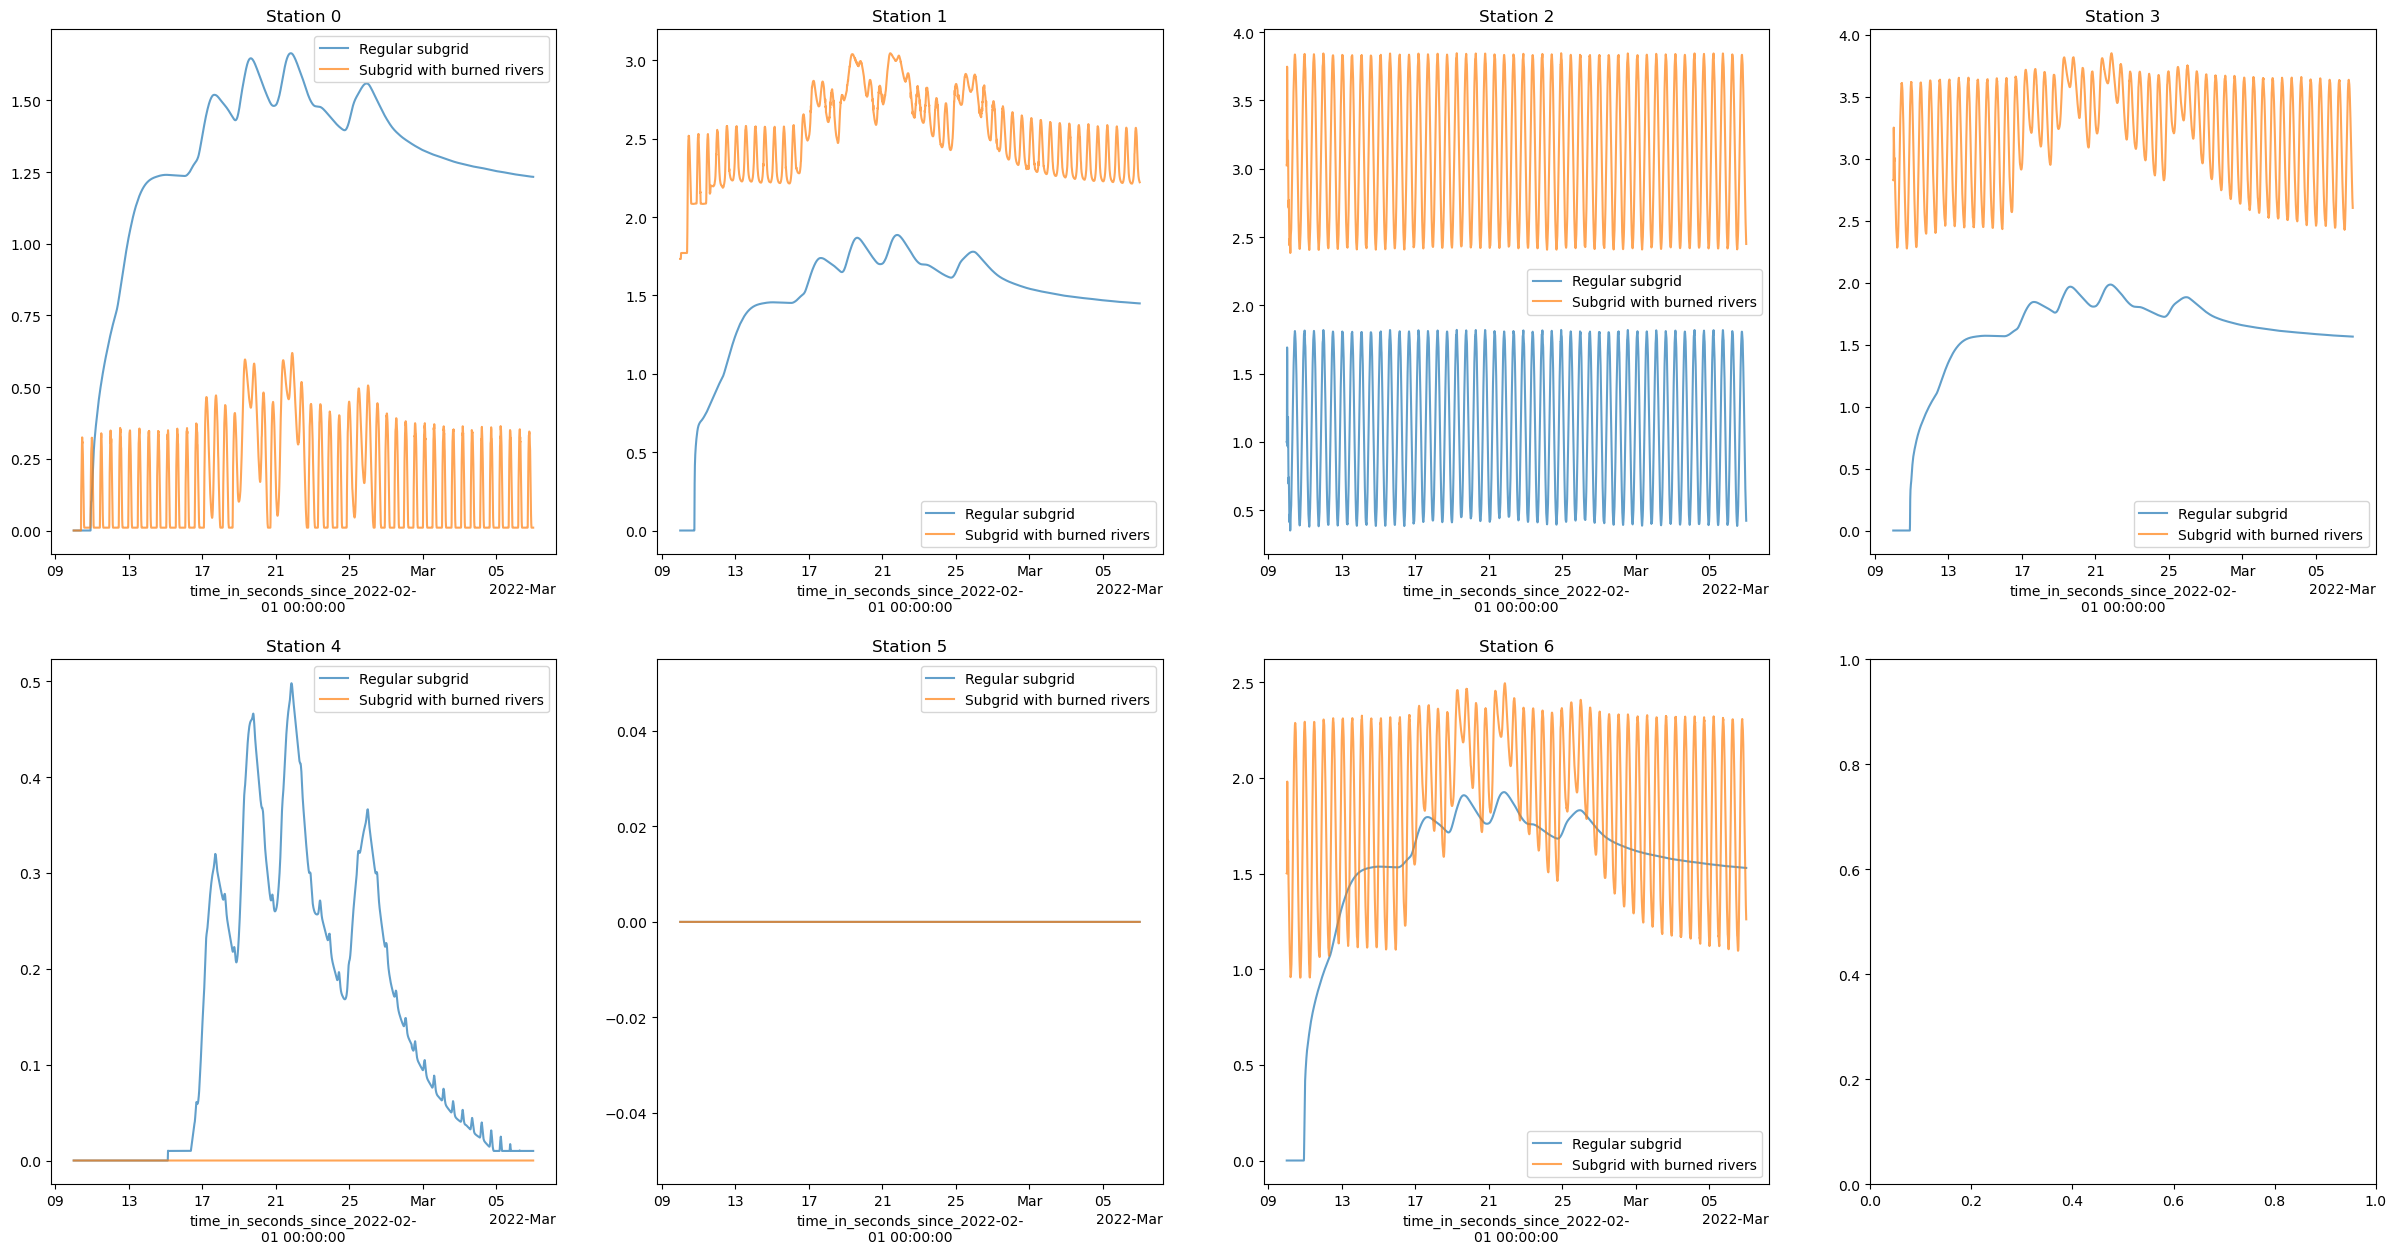

In [18]:
# Waterdepth

h_point = mod.results["point_zs"].rename({"stations": "station_id"})
h_point["station_id"] = h_point["station_id"].astype(int)

bed_level =  mod.results["point_zb"].rename({"stations": "station_id"})
bed_level["station_id"] = bed_level["station_id"].astype(int)
dh_point = h_point - bed_level


h_point_riv = mod_riv.results["point_zs"].rename({"stations": "station_id"})
h_point_riv["station_id"] = h_point_riv["station_id"].astype(int)

bed_level_riv =  mod_riv.results["point_zb"].rename({"stations": "station_id"})
bed_level_riv["station_id"] = bed_level_riv["station_id"].astype(int)


dh_point_riv = h_point_riv - bed_level_riv


fig, ax = plt.subplots(2,4, figsize = (30,15))
ax_flat = ax.flatten()


for i in range(len(h_point["station_id"])):
    # Plot the water level at the every gauge
    _ = dh_point.sel({"station_id": i + 1}).plot.line(
        x="time",
        ax = ax_flat[i],
        label = "Regular subgrid",
        alpha = 0.7
    )

    _ = dh_point_riv.sel({"station_id": i + 1}).plot.line(
        x="time",
        ax = ax_flat[i],
        label = "Subgrid with burned rivers",
        alpha = 0.7
    )

    ax_flat[i].set_title(f"Station {i}")
    ax_flat[i].legend()


Text(0.5, 1.0, 'Subgrid with burned in rivers')

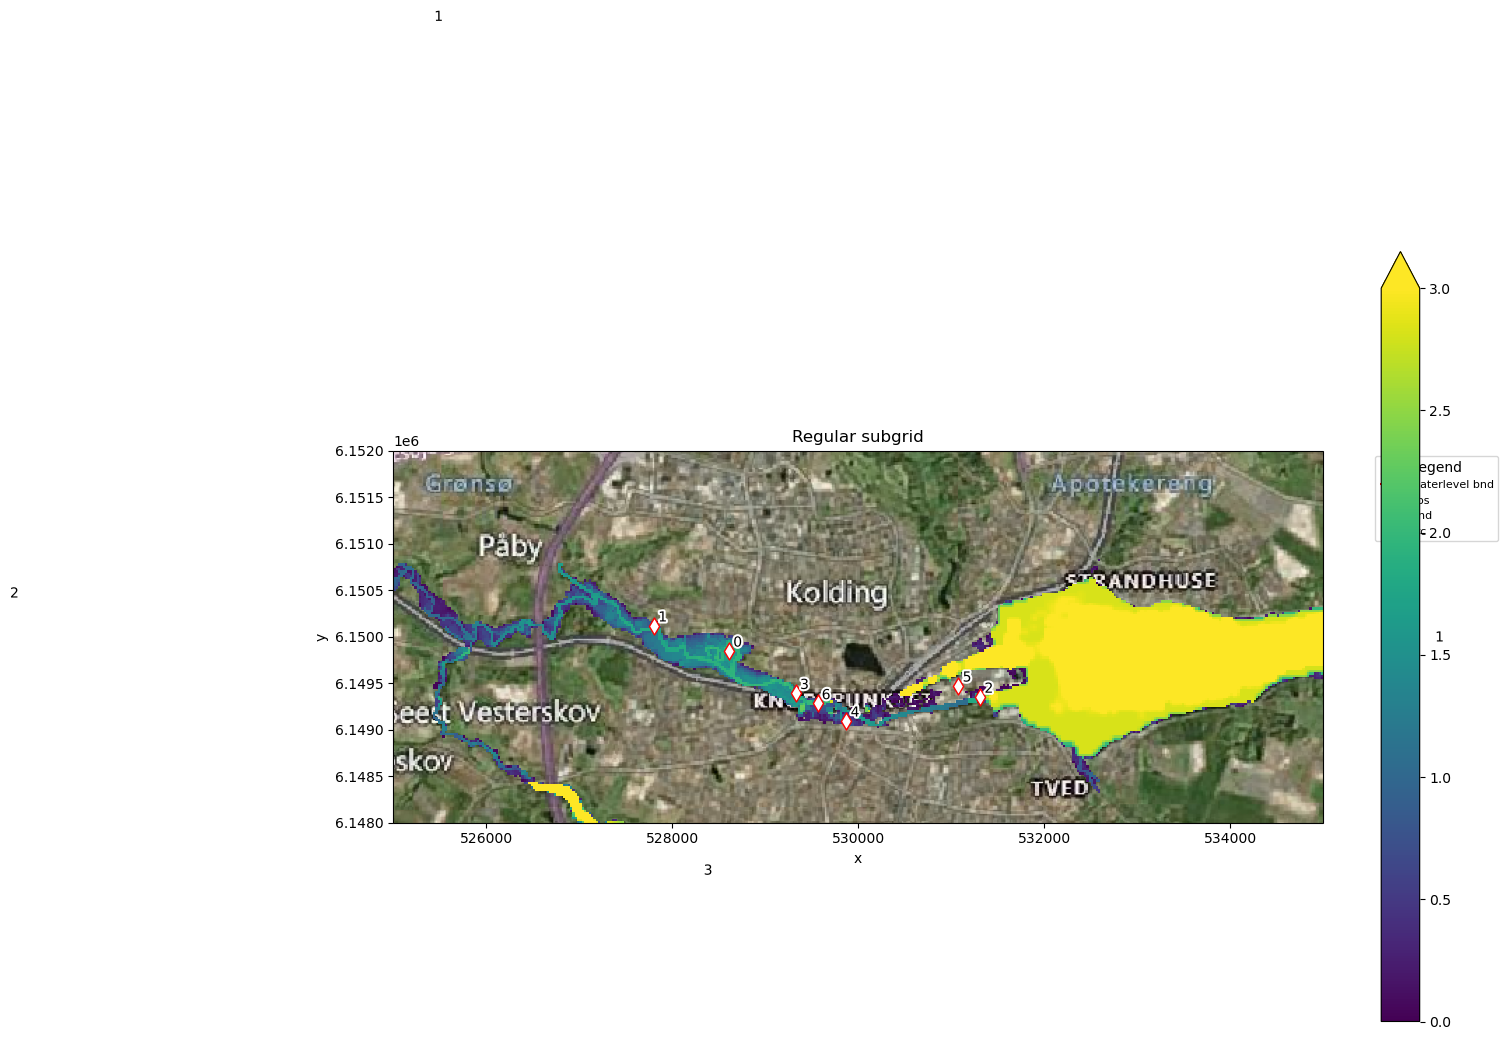

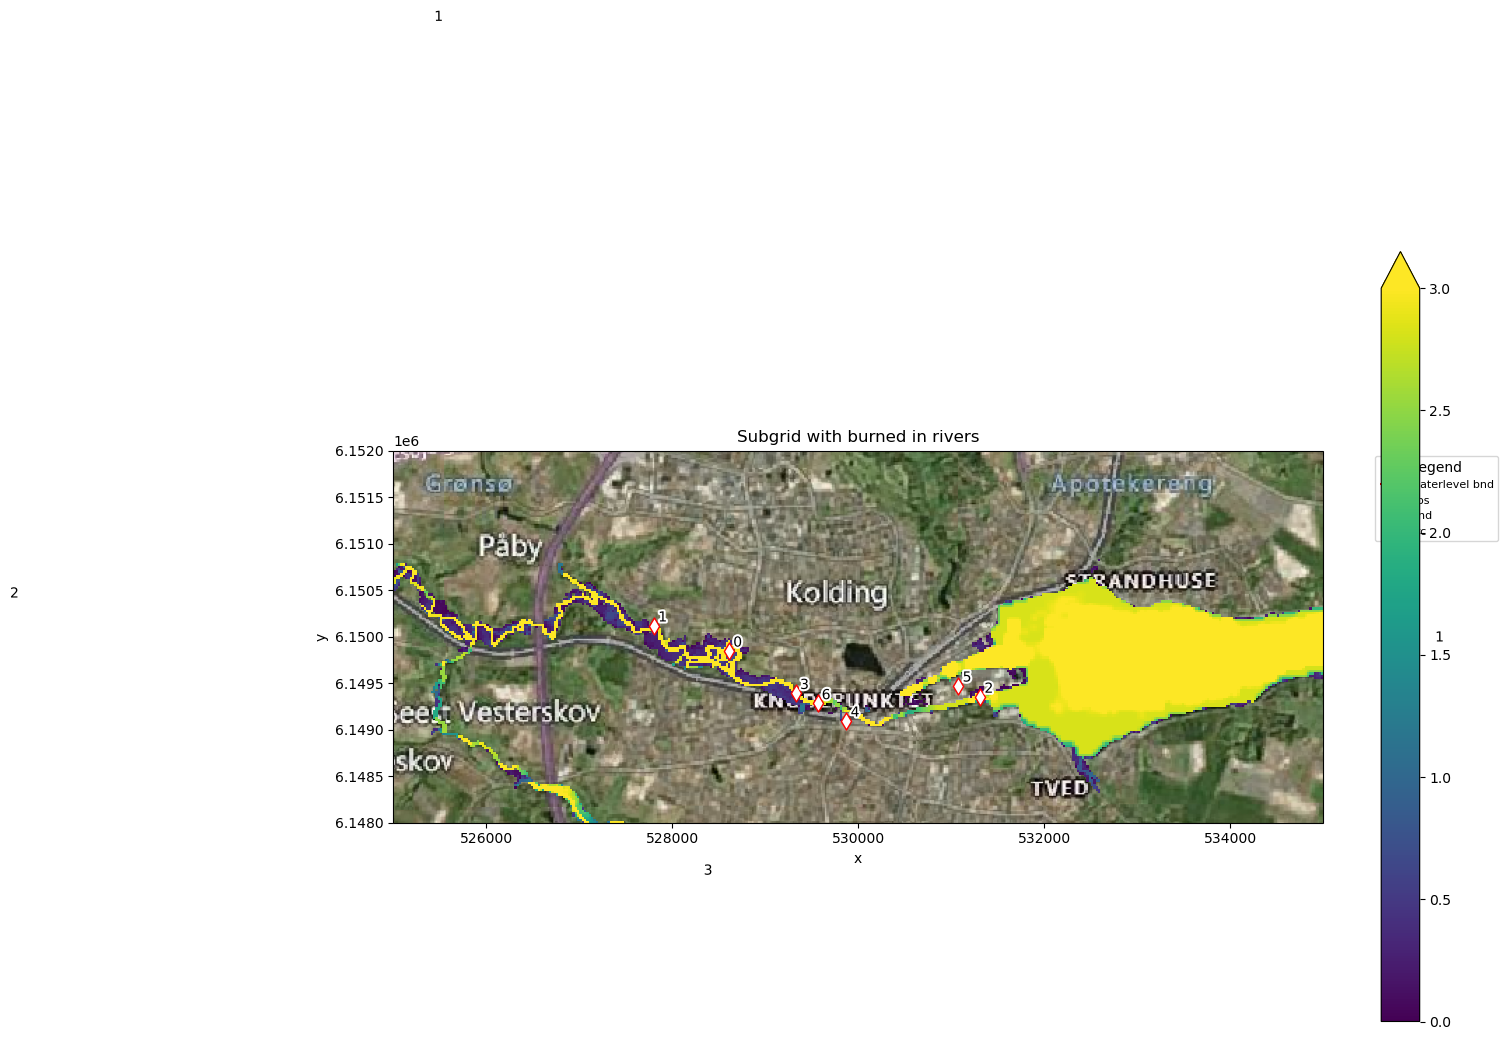

In [19]:
h_point = mod.results["point_zs"].rename({"stations": "station_id"})
h_point["station_id"] = h_point["station_id"].astype(int)

h_point_riv = mod_riv.results["point_zs"].rename({"stations": "station_id"})
h_point_riv["station_id"] = h_point_riv["station_id"].astype(int)


# HW range 

h_point = h_point.sel(time=slice('2022-02-15', '2022-03-01'))
h_point_riv= h_point_riv.sel(time=slice('2022-02-15', '2022-03-01'))

# fig, ax = plt.subplots(2,4, figsize = (30,15))
# ax_flat = ax.flatten()


# for i in range(len(h_point["station_id"])):
#     # Plot the water level at the every gauge
#     _ = h_point.sel({"station_id": i + 1}).plot.line(
#         x="time",
#         ax = ax_flat[i],
#         label = "Regular subgrid",
#         alpha = 0.7
#     )

#     _ = h_point_riv.sel({"station_id": i + 1}).plot.line(
#         x="time",
#         ax = ax_flat[i],
#         label = "Subgrid with burned rivers",
#         alpha = 0.7
#     )

#     ax_flat[i].set_title(f"Station {i}")
#     ax_flat[i].legend()

# Without rivers
    
zsmax = mod.results["zsmax"]
zs = mod.results["zs"]
bed_level =  mod.results["zb"].copy()

zs_HW = zs.sel(time=slice('2022-02-15', '2022-03-01'))
water_level_max_HW = zs_HW.max(dim = "time")
water_level_max_HW = water_level_max_HW - bed_level

# With rivers

zsmax_riv = mod_riv.results["zsmax"]
zs_riv= mod_riv.results["zs"]
bed_level_riv =  mod_riv.results["zb"].copy()

zs_HW_riv = zs_riv.sel(time=slice('2022-02-15', '2022-03-01'))
water_level_max_HW_riv = zs_HW_riv.max(dim = "time")
water_level_max_HW_riv = water_level_max_HW_riv - bed_level_riv



fig_base, ax_base = mod.plot_basemap(bmap="sat", 
                                     variable = "",
                                     figsize =(15,10))

cax_fld = water_level_max_HW.plot(
    x="x", y="y",
    ax=ax_base,
    vmin=0.0, vmax=3.0,
    cmap=plt.cm.viridis
)

ax_base.set_xlim(525000, 535000)
ax_base.set_ylim(6148000, 6152000)
ax_base.set_title("Regular subgrid")

fig_base, ax_base = mod_riv.plot_basemap(bmap="sat", 
                                     variable = "",
                                     figsize =(15,10))

cax_fld = water_level_max_HW_riv.plot(
    x="x", y="y",
    ax=ax_base,
    vmin=0.0, vmax=3.0,
    cmap=plt.cm.viridis
)

ax_base.set_xlim(525000, 535000)
ax_base.set_ylim(6148000, 6152000)
ax_base.set_title("Subgrid with burned in rivers")

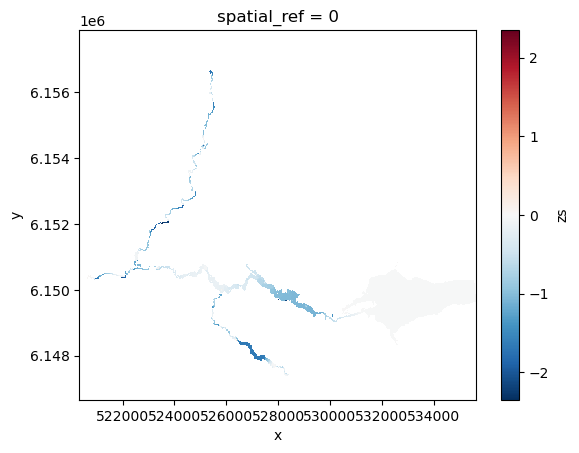

In [8]:
diff = water_level_max_HW_riv - water_level_max_HW 
diff.plot()


## Amimation

In [17]:
print("Make animation")

hmin = 0.05
da_h = mod.results["zs"].copy() - mod.results["zb"].copy()
da_h = da_h.where(da_h > hmin).drop("spatial_ref")
da_h.attrs.update(long_name="flood depth", unit="m")

step = 10  # one frame every <step> dtout
cbar_kwargs = {"shrink": 0.6, "anchor": (0, 0)}


def update_plot(i, da_h, cax_h):
    da_hi = da_h.isel(time=i)
    t = da_hi.time.dt.strftime("%d-%B-%Y %H:%M:%S").item()
    print( f"Animation t= {t}")
    ax.set_title(f"SFINCS water depth {t}")
    cax_h.set_array(da_hi.values.ravel())


fig, ax = mod.plot_basemap(
    fn_out=None, variable="", bmap="sat", plot_bounds=False, figsize=(11, 7)
)
cax_h = da_h.isel(time=0).plot(
    x="x", y="y",
    ax=ax,
    vmin=0, vmax=3,
    cmap=plt.cm.viridis,
    cbar_kwargs=cbar_kwargs
)
plt.close()  # to prevent double plot

ani = animation.FuncAnimation(
    fig,
    update_plot,
    frames=np.arange(0, da_h.time.size, step),
    interval=250,  # ms between frames
    fargs=(
        da_h,
        cax_h,
    ),
)

# to save to mp4
ani.save(join(sfincs_root , 'sfincs_h.mp4'), fps=4, dpi=200)


Make animation
Animation t= 01-February-2022 00:00:00
Animation t= 01-February-2022 00:00:00
Animation t= 01-February-2022 10:00:00
Animation t= 01-February-2022 20:00:00
Animation t= 02-February-2022 06:00:00
Animation t= 02-February-2022 16:00:00
Animation t= 03-February-2022 02:00:00
Animation t= 03-February-2022 12:00:00
Animation t= 03-February-2022 22:00:00
Animation t= 04-February-2022 08:00:00
Animation t= 04-February-2022 18:00:00
Animation t= 05-February-2022 04:00:00
Animation t= 05-February-2022 14:00:00
Animation t= 06-February-2022 00:00:00
Animation t= 06-February-2022 10:00:00
Animation t= 06-February-2022 20:00:00
Animation t= 07-February-2022 06:00:00
Animation t= 07-February-2022 16:00:00
Animation t= 08-February-2022 02:00:00
Animation t= 08-February-2022 12:00:00
Animation t= 08-February-2022 22:00:00
Animation t= 09-February-2022 08:00:00
Animation t= 09-February-2022 18:00:00
Animation t= 10-February-2022 04:00:00
Animation t= 10-February-2022 14:00:00
Animation 